In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### Import Data 

In [3]:
# import datafile for atheletes 
noc_regions_df = pd.read_csv("https://raw.githubusercontent.com/Kriskitt/SQLAssgn/main/noc_regions.csv")
athelete_events_df = pd.read_csv("https://raw.githubusercontent.com/Kriskitt/SQLAssgn/main/athlete_events.csv")

### Data Analysis 

In [6]:
# Basic information from dataframes
print("DF INFO: NOC REGIONS")
print(noc_regions_df.info())
print("=" * 50)
print("=" * 50)
print("DF INFO: Atheletes")
print(athelete_events_df.info())

DF INFO: NOC REGIONS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB
None
DF INFO: Atheletes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-nu

In [5]:
athelete_events_df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

en el dataframe de athelete_events podemos encontrar 3 variables tipo float64, 2 int64 y 10 variables categoricas. A la vez, podemos observar que 3 variables tienen valores nulos y estos son: 

- Age con 9474 nan values
- Height con 60171 nan values
- Weight con 62875 nan values 
- Medal con 231333 nan values 

In [49]:
noc_regions_df.describe().T

,count,unique,top,freq
NOC,230,230,JPN,1
region,227,206,Germany,4
notes,21,21,Yugoslavia,1


In [50]:
athelete_events_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.0,102097.25,135571.0
Age,261642.0,25.556898,6.393561,10.0,21.0,24.0,28.00,97.0
Height,210945.0,175.338970,10.518462,127.0,168.0,175.0,183.00,226.0
Weight,208241.0,70.702393,14.348020,25.0,60.0,70.0,79.00,214.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.0,2002.00,2016.0


podemos observar los siguientes datos estadisticos de los atletas: 

- edad promedio es de 25.55 la edad minima es 10 y la edad maxima es 97
- la altura promedio es de 175.33 cm la altura minima es 127 cm y la altura maxima es 226 
- el peso promedio 70.70 kg el peso minimo es de 25 kg y el peso maximo es de los 214 


In [51]:
df_women = athelete_events_df[athelete_events_df['Sex'] == 'F']

In [52]:
df_women.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,74522.0,69956.722887,38932.561177,5.0,36558.5,70128.0,103534.75,135568.0
Age,74098.0,23.732881,5.795252,11.0,20.0,23.0,27.00,74.0
Height,67378.0,167.839740,8.778528,127.0,162.0,168.0,173.00,213.0
Weight,66771.0,60.021252,10.212250,25.0,54.0,59.0,65.00,167.0
Year,74522.0,1992.445748,20.458993,1900.0,1984.0,1998.0,2008.00,2016.0


observamos los datos estadisticos promedios de las mujeres: 

- la edad promedio 23 años, la edad minima es de 10 años y la maxima es de 74 
- la altura promedio es de 167.83 cm, la altura minima es de 127 y la maxima de 213
- el peso promedio es de 60 kg, el peso minimo es de 25 y el maximo de 167 

In [53]:
df_women.dropna()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
105,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
163,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver
195,90,Tamila Rashidovna Abasova,F,21.0,163.0,60.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Cycling,Cycling Women's Sprint,Silver
286,153,Monica Cecilia Abbott,F,23.0,191.0,88.0,United States,USA,2008 Summer,2008,Summer,Beijing,Softball,Softball Women's Softball,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271076,135553,Galina Ivanovna Zybina (-Fyodorova),F,21.0,168.0,80.0,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,Gold
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [54]:
df_women["Medal"].value_counts()


Bronze    3771
Gold      3747
Silver    3735
Name: Medal, dtype: int64

In [55]:

summary_df = df_women.groupby("Medal").agg({
    "Age": ["mean", "min", "max"],
    "Weight": ["mean", "min", "max"],
    "Height": ["mean", "min", "max"],
    "Medal": "count"
}).reset_index()

# Renombrar las columnas para mayor claridad
summary_df.columns = ["Medal", 
                      "Avg_Age", "Min_Age", "Max_Age",
                      "Avg_Weight", "Min_Weight", "Max_Weight",
                      "Avg_Height", "Min_Height", "Max_Height",
                      "Medal_Count"]

# Mostrar el resumen
summary_df

,Medal,Avg_Age,Min_Age,Max_Age,Avg_Weight,Min_Weight,Max_Weight,Avg_Height,Min_Height,Max_Height,Medal_Count
0,Bronze,24.708743,12.0,69.0,63.029488,28.0,141.0,170.232982,136.0,205.0,3771
1,Gold,24.372596,13.0,63.0,63.463486,28.0,136.0,170.693872,136.0,210.0,3747
2,Silver,24.444891,11.0,55.0,63.167345,30.0,167.0,170.498993,136.0,204.0,3735


In [13]:
# Grouping the atheletes by gender
grouped = athelete_events_df.groupby(athelete_events_df["Sex"])
print("Male athletes")
print(grouped.get_group("M").nunique())
print("---")
print("Fem athletes")
print(grouped.get_group("F").nunique())
     

Male athletes
ID        101590
Name      100979
Sex            1
Age           74
Height        92
Weight       206
Team        1154
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         63
Event        554
Medal          3
dtype: int64
---
Fem athletes
ID        33981
Name      33808
Sex           1
Age          62
Height       77
Weight      140
Team        374
NOC         222
Games        50
Year         34
Season        2
City         42
Sport        53
Event       269
Medal         3
dtype: int64


In [14]:
athelete_events_df.isna().sum().sum()

363853

In [15]:
#Global info
gender_df = athelete_events_df.drop(
    ["ID", "Name", "Age", "Height", "Weight", "Team", "NOC", "Games", "Year", "Season", "City", "Sport", "Event"], axis='columns')
gender_df = gender_df.dropna()
gender_df
     

,Sex,Medal
3,M,Gold
37,M,Bronze
38,M,Bronze
40,M,Bronze
41,M,Bronze
...,...,...
271078,F,Silver
271080,F,Bronze
271082,M,Bronze
271102,F,Bronze


In [21]:
#Medal count
gender_df.groupby("Medal").count()

,Sex
Medal,
Bronze,13295
Gold,13372
Silver,13116


In [17]:
# Number of unique atheletes by gndr
gender_df.groupby("Sex").count()

,Medal
Sex,
F,11253
M,28530


In [19]:
athelete_events_df.groupby(["Season", "Sex"]).count()

ID    Name     Age  Height  Weight    Team     NOC   Games  \
Season Sex                                                                   
Summer F     59443   59443   59026   53856   53438   59443   59443   59443   
       M    163109  163109  154337  116839  115260  163109  163109  163109   
Winter F     15079   15079   15072   13522   13333   15079   15079   15079   
       M     33485   33485   33207   26728   26210   33485   33485   33485   

              Year    City   Sport   Event  Medal  
Season Sex                                         
Summer F     59443   59443   59443   59443   9442  
       M    163109  163109  163109  163109  24646  
Winter F     15079   15079   15079   15079   1811  
       M     33485   33485   33485   33485   3884

In [22]:
grouped = athelete_events_df.groupby(athelete_events_df["Season"])
print("Summer games")
print(grouped.get_group("Summer").nunique())
print("---")
print("Winter games")
print(grouped.get_group("Winter").nunique())

Summer games
ID        116776
Name      116122
Sex            2
Age           74
Height        95
Weight       219
Team        1157
NOC          230
Games         29
Year          29
Season         1
City          23
Sport         52
Event        651
Medal          3
dtype: int64
---
Winter games
ID        18958
Name      18923
Sex           2
Age          47
Height       64
Weight      125
Team        221
NOC         119
Games        22
Year         22
Season        1
City         19
Sport        17
Event       119
Medal         3
dtype: int64


In [23]:
athelete_events_df.groupby("Season").count()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal
Season,,,,,,,,,,,,,,
Summer,222552,222552,222552,213363,170695,168698,222552,222552,222552,222552,222552,222552,222552,34088
Winter,48564,48564,48564,48279,40250,39543,48564,48564,48564,48564,48564,48564,48564,5695


In [24]:
athelete_events_df.groupby("Team").count()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal
Team,,,,,,,,,,,,,,
30. Februar,2,2,2,2,2,1,2,2,2,2,2,2,2,0
A North American Team,4,4,4,3,0,0,4,4,4,4,4,4,4,4
Acipactli,3,3,3,3,3,3,3,3,3,3,3,3,3,0
Acturus,2,2,2,1,0,0,2,2,2,2,2,2,2,0
Afghanistan,126,126,126,78,54,61,126,126,126,126,126,126,126,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zambia,183,183,183,154,128,139,183,183,183,183,183,183,183,2
Zefyros,2,2,2,2,2,2,2,2,2,2,2,2,2,0
Zimbabwe,309,309,309,307,286,287,309,309,309,309,309,309,309,22


In [27]:
url = "https://raw.githubusercontent.com/Kriskitt/SQLAssgn/main/athlete_events.csv"
athlete_events_df = pd.read_csv(url)

In [30]:
medals_by_year = athlete_events_df.groupby("Year")["Medal"].count().reset_index()

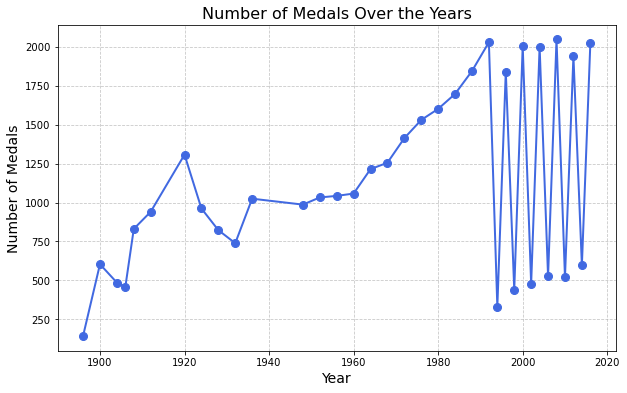

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(medals_by_year["Year"], medals_by_year["Medal"], marker='o', color='royalblue', linestyle='-', linewidth=2, markersize=8)
plt.title("Number of Medals Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Medals", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [32]:
print(medals_by_year)

    Year  Medal
0   1896    143
1   1900    604
2   1904    486
3   1906    458
4   1908    831
5   1912    941
6   1920   1308
7   1924    962
8   1928    823
9   1932    739
10  1936   1025
11  1948    987
12  1952   1033
13  1956   1043
14  1960   1058
15  1964   1215
16  1968   1256
17  1972   1414
18  1976   1531
19  1980   1602
20  1984   1698
21  1988   1845
22  1992   2030
23  1994    331
24  1996   1842
25  1998    440
26  2000   2004
27  2002    478
28  2004   2001
29  2006    526
30  2008   2048
31  2010    520
32  2012   1941
33  2014    597
34  2016   2023


In [33]:
medals_by_year_sex = athlete_events_df.groupby(["Year", "Sex"])["Medal"].count().reset_index()

In [36]:
male_data = medals_by_year_sex[medals_by_year_sex["Sex"] == "M"]
female_data = medals_by_year_sex[medals_by_year_sex["Sex"] == "F"]
print("\nTable for male_data:")
print(male_data)
print("\nTable for female_data:")
print(female_data)


Table for male_data:
    Year Sex  Medal
0   1896   M    143
2   1900   M    591
4   1904   M    476
6   1906   M    452
8   1908   M    815
10  1912   M    911
12  1920   M   1264
14  1924   M    910
16  1928   M    720
18  1932   M    671
20  1936   M    928
22  1948   M    871
24  1952   M    875
26  1956   M    872
28  1960   M    863
30  1964   M    969
32  1968   M    995
34  1972   M   1119
36  1976   M   1091
38  1980   M   1117
40  1984   M   1150
42  1988   M   1228
44  1992   M   1339
46  1994   M    223
48  1996   M   1078
50  1998   M    251
52  2000   M   1124
54  2002   M    270
56  2004   M   1103
58  2006   M    295
60  2008   M   1116
62  2010   M    291
64  2012   M   1023
66  2014   M    332
68  2016   M   1054

Table for female_data:
    Year Sex  Medal
1   1900   F     13
3   1904   F     10
5   1906   F      6
7   1908   F     16
9   1912   F     30
11  1920   F     44
13  1924   F     52
15  1928   F    103
17  1932   F     68
19  1936   F     97
21  1948   F  

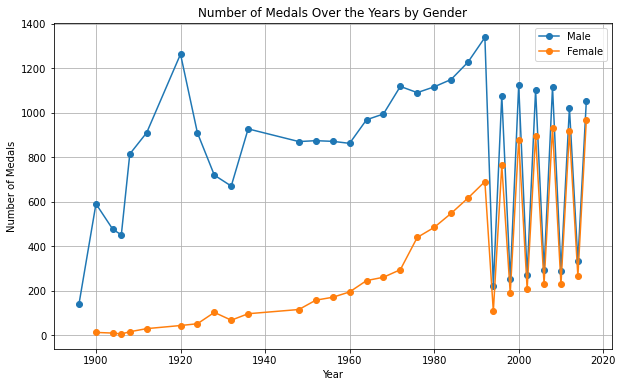

In [37]:
# Plot the trends for male and female
plt.figure(figsize=(10, 6))
plt.plot(male_data["Year"], male_data["Medal"], marker='o', label='Male')
plt.plot(female_data["Year"], female_data["Medal"], marker='o', label='Female')
plt.title("Number of Medals Over the Years by Gender")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.legend()
plt.grid(True)
plt.show()

In [56]:
df_women

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271099,135560,Stavroula Zygouri,F,36.0,171.0,63.0,Greece,GRE,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Women's Middleweight, Freestyle",NaN
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze
271103,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,64.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,Silver


In [34]:
noc_regions_df

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [57]:
# Realizar el merge interno solo para la columna "region"
df_women = pd.merge(df_women, noc_regions_df[['NOC', 'region']], on='NOC', how='inner')
df_women.dropna()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
11,690,Chantal Achterberg,F,27.0,172.0,72.0,Netherlands,NED,2012 Summer,2012,Summer,London,Rowing,Rowing Women's Coxed Eights,Bronze,Netherlands
12,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver,Netherlands
18,1169,Marilyn Agliotti,F,29.0,172.0,58.0,Netherlands,NED,2008 Summer,2008,Summer,Beijing,Hockey,Hockey Women's Hockey,Gold,Netherlands
19,1169,Marilyn Agliotti,F,33.0,172.0,58.0,Netherlands,NED,2012 Summer,2012,Summer,London,Hockey,Hockey Women's Hockey,Gold,Netherlands
26,4720,Tessa Appeldoorn,F,27.0,177.0,71.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Women's Coxed Eights,Silver,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73867,129665,"Hannelore ""Hanni"" Wenzel (-Weirather)",F,23.0,165.0,57.0,Liechtenstein,LIE,1980 Winter,1980,Winter,Lake Placid,Alpine Skiing,Alpine Skiing Women's Slalom,Gold,Liechtenstein
74072,121646,Trn Hiu Ngn,F,26.0,157.0,47.0,Vietnam,VIE,2000 Summer,2000,Summer,Sydney,Taekwondo,Taekwondo Women's Featherweight,Silver,Vietnam
74173,21147,Mavzuna Chorieva,F,19.0,160.0,60.0,Tajikistan,TJK,2012 Summer,2012,Summer,London,Boxing,Boxing Women's Lightweight,Bronze,Tajikistan
74314,86595,Francine Niyonsaba,F,23.0,166.0,60.0,Burundi,BDI,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 800 metres,Silver,Burundi


In [61]:
grouped_df = df_women.groupby(["region", "Medal"]).agg({
    "Age": ["mean", "min", "max"],
    "Weight": ["mean", "min", "max"],
    "Height": ["mean", "min", "max"],
    "Medal": "count"
}).reset_index()

# Renombrar las columnas para mayor claridad
grouped_df.columns = ["Region", "Medal", 
                      "Avg_Age", "Min_Age", "Max_Age",
                      "Avg_Weight", "Min_Weight", "Max_Weight",
                      "Avg_Height", "Min_Height", "Max_Height",
                      "Medal_Count"]

# Mostrar el DataFrame resultante
print(grouped_df)

        Region   Medal    Avg_Age  Min_Age  Max_Age  Avg_Weight  Min_Weight  \
0      Algeria  Bronze  23.000000     23.0     23.0   52.000000        52.0   
1      Algeria    Gold  26.500000     24.0     29.0   51.500000        49.0   
2    Argentina  Bronze  27.594595     20.0     36.0   59.594595        48.0   
3    Argentina    Gold  29.500000     29.0     30.0   55.500000        48.0   
4    Argentina  Silver  24.794118     18.0     34.0   59.818182        47.0   
..         ...     ...        ...      ...      ...         ...         ...   
215  Venezuela  Silver  20.000000     20.0     20.0   72.000000        72.0   
216    Vietnam  Silver  26.000000     26.0     26.0   47.000000        47.0   
217   Zimbabwe  Bronze  20.000000     20.0     20.0   64.000000        64.0   
218   Zimbabwe    Gold  26.235294     20.0     35.0   59.352941        47.0   
219   Zimbabwe  Silver  23.000000     20.0     24.0   64.000000        64.0   

     Max_Weight  Avg_Height  Min_Height  Max_Height

In [62]:
print(grouped_df)

        Region   Medal    Avg_Age  Min_Age  Max_Age  Avg_Weight  Min_Weight  \
0      Algeria  Bronze  23.000000     23.0     23.0   52.000000        52.0   
1      Algeria    Gold  26.500000     24.0     29.0   51.500000        49.0   
2    Argentina  Bronze  27.594595     20.0     36.0   59.594595        48.0   
3    Argentina    Gold  29.500000     29.0     30.0   55.500000        48.0   
4    Argentina  Silver  24.794118     18.0     34.0   59.818182        47.0   
..         ...     ...        ...      ...      ...         ...         ...   
215  Venezuela  Silver  20.000000     20.0     20.0   72.000000        72.0   
216    Vietnam  Silver  26.000000     26.0     26.0   47.000000        47.0   
217   Zimbabwe  Bronze  20.000000     20.0     20.0   64.000000        64.0   
218   Zimbabwe    Gold  26.235294     20.0     35.0   59.352941        47.0   
219   Zimbabwe  Silver  23.000000     20.0     24.0   64.000000        64.0   

     Max_Weight  Avg_Height  Min_Height  Max_Height